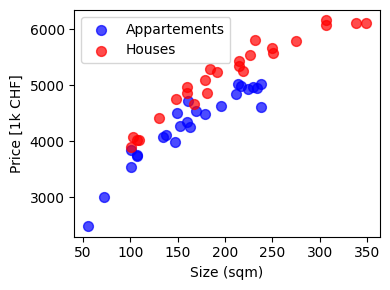

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from utils import load_house_data, plot_housing_data_classified, \
    animate_logistic_regression, plot_fit_landscape_and_loss

sizes, prices, labels = load_house_data('data/housing_prices.txt')

plot_housing_data_classified(sizes, prices, labels)

In [ ]:
# Scale the input features
####### YOUR CODE HERE #######
size_scaled = ...
price_scaled = ...
####### END YOUR CODE ########


# Create feature list: [size, price, size^2, price^2]
####### YOUR CODE HERE #######
features = [
    ...,           # Feature 0: size
    ...,          # Feature 1: price  
    ...,      # Feature 2: size^2
    ...      # Feature 3: price^2
]
####### END YOUR CODE ########

# Convert to numpy array for easier computation
# (We also need to transpose the array))
feature_matrix = np.array(features).T

feature_names = ['size', 'price', 'size²', 'price²']
    

In [ ]:
def sigmoid(z):
    """Sigmoid activation function"""
    # To prevent overflow in the exponential function, we clip z
    z = np.clip(z, -500, 500)
    ####### YOUR CODE HERE #######
    return ...
    ####### END YOUR CODE ########


def calculate_logistic_loss(weights, bias, features, labels):
    """Calculate logistic loss for any number of features"""
    # Linear combination: z = w1*x1 + w2*x2 + ... + wn*xn + b

    # Calculate the linear combination
    # Recall: the linear combination is z = w1*x1 + w2*x2 + ... + wn*xn + b
    # where weights is a vector of shape (n_features,) and features is a matrix of shape (n_samples, n_features).
    # The bias is a scalar.
    # we can use np.dot to compute the dot product between features and weights, and then add the bias.
    # this results in a vector z of shape (n_samples,).
    z = np.dot(features, weights) + bias

    # Apply the sigmoid function to get predictions
    ##### YOUR CODE HERE #######
    y_pred = ...
    ####### END YOUR CODE ########
    
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    
    # Implement the binary cross-entropy loss
    # Recall: L = -(1/N) * Σ [y * log(y_pred) + (1 - y) * log(1 - y_pred)]
    ##### YOUR CODE HERE #######
    loss = ...
    ####### END YOUR CODE ########
    return loss


def gradient_descent_logistic(features, labels, learning_rate=0.05, n_iterations=150):
    """Perform gradient descent for logistic regression with any number of features"""
    n_features = features.shape[1]
    
    # Initialize parameters
    weights = np.zeros(n_features)
    bias = 0.0
    
    # Store training history
    weights_history = [weights.copy()]
    bias_history = [bias]
    loss_history = [calculate_logistic_loss(weights, bias, features, labels)]
    
    for i in range(n_iterations):
        # Forward pass
        # Calculate the linear combination
        z = np.dot(features, weights) + bias

        # Apply the sigmoid function to get predictions
        ##### YOUR CODE HERE #######
        y_pred = ...
        ####### END YOUR CODE ########

        # Calculate gradients
        error = y_pred - labels
        weight_gradients = np.dot(features.T, error) / len(labels)
        bias_gradient = np.mean(error)
        
        # Update parameters
        ####### YOUR CODE HERE #######
        weights -= ...
        bias -= ...
        ####### END YOUR CODE ########
        
        # Store history
        weights_history.append(weights.copy())
        bias_history.append(bias)
        current_loss = calculate_logistic_loss(weights, bias, features, labels)
        loss_history.append(current_loss)
    
    return np.array(weights_history), np.array(bias_history), np.array(loss_history)


weights_history, bias_history, loss_history = gradient_descent_logistic(
    features, labels, learning_rate=0.2, n_iterations=400
)
        
# Create animation
anim = animate_logistic_regression(
    features, labels, weights_history, bias_history, loss_history, feature_names,
    # save_path="output/nonlinear_logistic_regression.mp4"
)